In [409]:
# 이미지 증폭

# from PIL import Image
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
# import glob

# img_dir = 'C:\\Users\\kimkm\\광고'
# categories = ['ad', 'non-ad']

# image_w = 256
# image_h = 256

# # datagen = ImageDataGenerator(
# #     rotation_range=40,
# #     width_shift_range=0.2,
# #     height_shift_range=0.2,
# #     shear_range=0.2,
# #     zoom_range=0.2,
# #     horizontal_flip=True,
# #     vertical_flip=True,
# #     fill_mode='nearest')

# datagen = ImageDataGenerator(
#     rotation_range=360,
#     fill_mode='nearest')


# for idx, ad in enumerate(categories):
#     img_dir_detail = img_dir + "\\" + ad
#     files = glob.glob(img_dir_detail+"/*.jpg")
    
#     for f in files:
#         try:
#             img = Image.open(f)
#             img = img.convert("RGB")
#             img = img.resize((image_w, image_h))
#             x = img_to_array(img)
#             x = x.reshape((1,) + x.shape)
            
#             i = 0
#             for batch in datagen.flow(x, batch_size=1, save_to_dir= img_dir_detail + "\\output", save_prefix= str(i),
#                                                  save_format='jpg'):
#                 i += 1
#                 if i > 4:
#                     break
#         except FileExistsError:
#             pass
                


In [410]:
#본 코드 시작

from PIL import Image
import glob, sys, numpy as np
from  keras.utils import np_utils

img_dir = 'C:\\Users\\kimkm\\광고'
categories = ['ad', 'non-ad']
np_classes = len(categories)

image_w = 64
image_h = 64

pixel = image_h * image_w * 3 # RGB 값

X = []
y = []

for idx, ad in enumerate(categories):
    img_dir_detail = img_dir + "\\" + ad + "\\output" 
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            #if i % 300 == 0:
            print(ad, " : ", f)
        except:
            print(ad, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

ad  :  C:\Users\kimkm\광고\ad\output\0_0_1002.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1005.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1007.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1011.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1013.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1015.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1017.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_102.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1023.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1027.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1028.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1029.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_104.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1042.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1045.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1048.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1050.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1051.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1056.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_1057.jpg
ad  :  C:\Users\kimkm\광고\ad\output\0_0_106

In [411]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, shuffle=True)

print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

(4456, 64, 64, 3)
4456
[2182 2274]
[401 386]


In [418]:
import os

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.15))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model_dir = 'C:\\Users\\kimkm\\광고\\model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "\\ad_non_ad_classify.model"
    
    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [419]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 8, 8, 64)        

In [420]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.15, callbacks=[checkpoint, early_stopping])

Epoch 1/100
59/60 [============================>.] - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.5649
Epoch 00001: val_loss improved from inf to 0.62249, saving model to C:\Users\kimkm\광고\model\ad_non_ad_classify.model
INFO:tensorflow:Assets written to: C:\Users\kimkm\광고\model\ad_non_ad_classify.model\assets
60/60 [==============================] - 14s 236ms/step - loss: 0.6778 - accuracy: 0.5646 - val_loss: 0.6225 - val_accuracy: 0.6383
Epoch 2/100
59/60 [============================>.] - ETA: 0s - loss: 0.6080 - accuracy: 0.6841
Epoch 00002: val_loss improved from 0.62249 to 0.60462, saving model to C:\Users\kimkm\광고\model\ad_non_ad_classify.model
INFO:tensorflow:Assets written to: C:\Users\kimkm\광고\model\ad_non_ad_classify.model\assets
60/60 [==============================] - 13s 219ms/step - loss: 0.6082 - accuracy: 0.6831 - val_loss: 0.6046 - val_accuracy: 0.6771
Epoch 3/100
59/60 [============================>.] - ETA: 0s - loss: 0.5577 - accura

In [421]:
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 1s 30ms/step - loss: 0.4022 - accuracy: 0.8640
정확도 : 0.86 


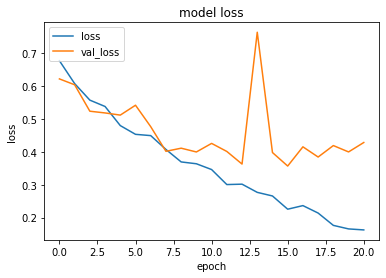

In [422]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

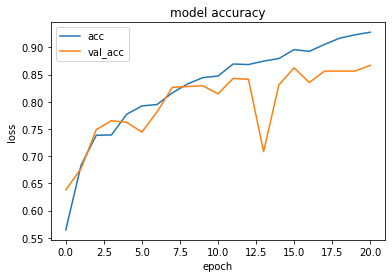

In [423]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [424]:
from PIL import Image
#import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model

import tensorflow as tf

seed = 5
tf.random.set_seed(seed)
np.random.seed(seed)

caltech_dir = 'C:\\Users\\kimkm\\광고\\test'


image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.jpg")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)
    
X = np.array(X)
X = X.astype(float) / 255

model = load_model('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model')


prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
cnt = 0
for i in prediction:
    if i >= 0.5: print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 비광고 로 추정됩니다.")
    else : print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 광고 로 추정됩니다.")
    cnt += 1

해당 test1.jpg  이미지는 비광고 로 추정됩니다.
해당 test2.jpg  이미지는 광고 로 추정됩니다.
해당 test3.jpg  이미지는 광고 로 추정됩니다.
해당 test4.jpg  이미지는 비광고 로 추정됩니다.
해당 test5.jpg  이미지는 비광고 로 추정됩니다.
해당 test6.jpg  이미지는 비광고 로 추정됩니다.
해당 test7.jpg  이미지는 광고 로 추정됩니다.
해당 test8.jpg  이미지는 광고 로 추정됩니다.
해당 test9.jpg  이미지는 비광고 로 추정됩니다.
